<a href="https://colab.research.google.com/github/Abdullah-2007-kali/BANK_system/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

df1 = pd.read_csv("/content/acne_surveys.csv")
df1['new_colom'] = 0

df2 = pd.read_csv("/content/eczema_surveys.csv")
df2['new_colom'] = 1

df3 = pd.read_csv("/content/infectious_skin_surveys.csv")
df3['new_colom'] = 2

df4 = pd.read_csv("/content/pigment_diseases_surveys.csv")
df4['new_colom'] = 3

# دمج كل الداتا
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# لو عايز تحفظ الملف النهائي
df.to_csv("final_dermax.csv", index=False)

df


,سؤال 1,سؤال 2,سؤال 3,سؤال 4,سؤال 5,new_colom
0,بقالي 10 أيام بس.,آه لما بعرق بحس بحكة.,آه لونها بيبقى أحمر بعد الشمس.,لا، دي حاجة جديدة عليا.,لا، كل حاجة زي ما هي.,0
1,منذ ما يقارب ثلاث سنوات.,لا، مجرد بقع عادية.,آه بعضهم بيتحول لحبوب مؤلمة.,نعم، أختي ظهرت عندها من قبل.,آه، أكلت وجبات سريعة كتير.,0
2,من أول ما سافرت مكان فيه جو مختلف.,نعم، يخرج منها صديد.,آه ساعات بتسيب أثر غامق.,نعم، والدي قال إنها طبيعية في هذا السن.,آه، شربت مشروبات غازية كتير.,0
3,منذ أول امتحانات مررت بها.,آه أوقات بحس إنها بتلسعني.,آه في حبوب بتنفخ وتورم.,آه، في أكتر من واحد في العيلة.,نعم، تعرضت لأشعة الشمس كثيرًا.,0
4,لسه طالعالي من كام شهر.,ساعات بتجيب ميّه وصديد.,نعم، بعضها يصبح منتفخًا ومتورمًا.,آه، في واحد من قرايبنا كان عنده كتير.,نعم، تناولت الحلويات بكثرة.,0
...,...,...,...,...,...,...
7995,ظهرت بعد العطلة.,آه ساعات بيطلع فيها قشور صغيرة.,آه بعض البقع بتكبر في الشتاء.,لا، محدش أصيب قبل كده.,نعم، استخدمت كريم لعلاج الحبوب.,3
7996,ظهرت بعد فصل الصيف.,نعم، يوجد جفاف حول البقع.,آه اللون بيتغير بعد فترة.,آه قريب ليا ظهر له نفس الموضوع.,آه الجو حر وأوقات برد قوي.,3
7997,أول ما الجو اتغير وبقى حر.,نعم، الحكة تظهر أحيانًا ليلًا.,آه لونها بيتغير مع التوتر النفسي.,آه أختي عندها نمش.,آه استخدمت غسول جديد للوش.,3
7998,أول ما الجو اتغير وبقى حر.,آه بيظهر حكة أحيانًا في الليل.,لا، ثابتة زي ما ظهرت.,لا، لا توجد أي سوابق عائلية أخرى.,آه أكلت أكل دسم كتير.,3


In [15]:
print("acne:", len(df1))
print("eczema:", len(df2))
print("infectious:", len(df3))
print("pigment:", len(df4))
print("final_dermax:", len(df))


acne: 2000
eczema: 2000
infectious: 2000
pigment: 2000
final_dermax: 8000


In [2]:
# ============================
# 1. تثبيت المكتبات المطلوبة
# ============================

# ============================
# 2. تحميل البيانات
# ============================
import pandas as pd

# تحميل ملفك
df = pd.read_csv("final_dermax.csv")

# دمج كل الأسئلة في نص واحد
df["text"] = df["سؤال 1"] + " " + df["سؤال 2"] + " " + df["سؤال 3"] + " " + df["سؤال 4"] + " " + df["سؤال 5"]

texts = df["text"].tolist()
labels = df["new_colom"].tolist()

print("عدد العينات:", len(texts))
print("عدد الفئات:", len(set(labels)))

# ============================
# 3. تقسيم البيانات (تدريب / اختبار)
# ============================
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# ============================
# 4. تحميل Tokenizer الخاص بـ MARBERT
# ============================
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("UBC-NLP/MARBERT")

# ============================
# 5. تحويل النصوص إلى مدخلات للنموذج
# ============================
def tokenize(texts, labels, tokenizer, max_len=128):
    encodings = tokenizer(
        texts, truncation=True, padding=True, max_length=max_len, return_tensors="tf"
    )
    return encodings, labels

train_encodings, train_labels = tokenize(train_texts, train_labels, tokenizer)
test_encodings, test_labels = tokenize(test_texts, test_labels, tokenizer)

# ============================
# 6. تحميل نموذج MARBERT للتصنيف
# ============================
from transformers import TFAutoModelForSequenceClassification
import tensorflow as tf

num_labels = len(set(labels))

model = TFAutoModelForSequenceClassification.from_pretrained(
    "UBC-NLP/MARBERT", num_labels=num_labels
)

# ============================
# 7. تجهيز البيانات لـ TensorFlow
# ============================
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(16)

# ============================
# 8. إعداد وتدريب النموذج
# ============================
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# تدريب النموذج (عدد Epochs = 3 كبداية)
history = model.fit(train_dataset, validation_data=test_dataset, epochs=3)

# ============================
# 9. تقييم النموذج
# ============================
loss, acc = model.evaluate(test_dataset)
print(f"دقة النموذج: {acc:.2f}")

# ============================
# 10. حفظ النموذج والـ Tokenizer
# ============================
model.save_pretrained("./dermax_marbert_model")
tokenizer.save_pretrained("./dermax_marbert_model")

print("تم حفظ النموذج في ./dermax_marbert_model")


عدد العينات: 8000
عدد الفئات: 4


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/376 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


tf_model.h5:   0%|          | 0.00/652M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERT and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
400/400 [==============================] - 146s 222ms/step - loss: 0.2101 - accuracy: 0.9250 - val_loss: 0.0344 - val_accuracy: 0.9894
Epoch 2/3
400/400 [==============================] - 79s 197ms/step - loss: 0.0225 - accuracy: 0.9944 - val_loss: 0.0095 - val_accuracy: 0.9975
Epoch 3/3
100/100 [==============================] - 6s 63ms/step - loss: 0.0137 - accuracy: 0.9969
دقة النموذج: 1.00
تم حفظ النموذج في ./dermax_marbert_model


100/100 [==============================] - 9s 61ms/step
Classification Report:
                       precision    recall  f1-score   support

     Acne (حب الشباب)       1.00      0.99      0.99       400
    Eczema (الإكزيما)       1.00      1.00      1.00       400
   Infectious (معدية)       0.99      1.00      0.99       400
Pigmentation (تصبغات)       1.00      1.00      1.00       400

             accuracy                           1.00      1600
            macro avg       1.00      1.00      1.00      1600
         weighted avg       1.00      1.00      1.00      1600



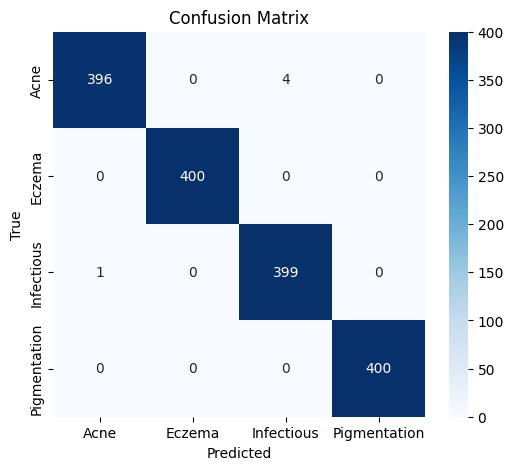

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

# ============================
# 1. التوقعات على بيانات الاختبار
# ============================
preds = model.predict(test_dataset)
y_pred = np.argmax(preds.logits, axis=1)
y_true = np.array(test_labels)

# ============================
# 2. تقرير التصنيف
# ============================
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=[
    "Acne (حب الشباب)",
    "Eczema (الإكزيما)",
    "Infectious (معدية)",
    "Pigmentation (تصبغات)"
]))

# ============================
# 3. مصفوفة الالتباس
# ============================
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Acne", "Eczema", "Infectious", "Pigmentation"],
            yticklabels=["Acne", "Eczema", "Infectious", "Pigmentation"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [4]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

model = TFAutoModelForSequenceClassification.from_pretrained("./dermax_marbert_model")
tokenizer = AutoTokenizer.from_pretrained("./dermax_marbert_model")

# تجربة على نص جديد
text = "بقالي أسبوع الحبوب ظهرت بعد الامتحانات."
inputs = tokenizer(text, return_tensors="tf", padding=True, truncation=True, max_length=128)
outputs = model(inputs)
pred = tf.argmax(outputs.logits, axis=1).numpy()[0]
print("التصنيف المتوقع:", pred)


Some layers from the model checkpoint at ./dermax_marbert_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at ./dermax_marbert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


التصنيف المتوقع: 2


In [5]:
!zip -r /content/dermax_marbert_model.zip /content/dermax_marbert_model


  adding: content/dermax_marbert_model/ (stored 0%)
  adding: content/dermax_marbert_model/final.csv (deflated 92%)
  adding: content/dermax_marbert_model/tf_model.h5 (deflated 7%)
  adding: content/dermax_marbert_model/vocab.txt (deflated 61%)
  adding: content/dermax_marbert_model/config.json (deflated 55%)
  adding: content/dermax_marbert_model/tokenizer_config.json (deflated 74%)
  adding: content/dermax_marbert_model/tokenizer.json (deflated 72%)
  adding: content/dermax_marbert_model/special_tokens_map.json (deflated 42%)


In [6]:
from google.colab import files
files.download('/content/dermax_marbert_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>